In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Get the Data
Set index_col=0 to use the first column as the index.

In [2]:
df = pd.read_csv("glass.csv",index_col=0)

In [3]:
df.head()

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,,,,,,,,,
1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


<Axes: >

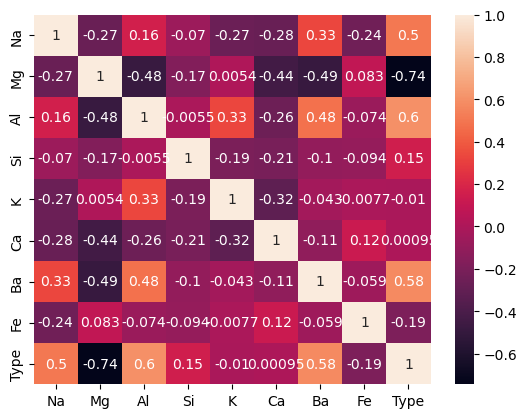

In [4]:
import seaborn as sns

sns.heatmap(df.corr(),annot=True)

# Standardize the Variables
Because the KNN classifier predicts the class of a given test observation by 
identifying the observations that are nearest to it, the scale of the variables matters. 
Any variables that are on a large scale will have a much larger effect on the distance between the observations,
and hence on the KNN classifier, than variables that are on a small scale.

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [12]:
scaler.fit(df.drop('Type',axis=1))

StandardScaler()

In [13]:
df.head()

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,,,,,,,,,
1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [14]:
scaled_features = scaler.transform(df.drop('Type',axis=1))

In [15]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


# Train Test Split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df_feat,df['Type'],
                                                    test_size=0.30)

# Using KNN
Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier(n_neighbors=1)

In [45]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [52]:
pred = knn.predict(X_test)

In [53]:
pred[:5]

array([1, 2, 1, 5, 7], dtype=int64)

In [49]:
import pickle
pickle.dump(knn, open("knnmodel.sav", 'wb'))


In [27]:
knn_obj = pickle.load(open("knnmodel.sav", 'rb'))
knn_obj.predict(X_test)


array([3, 2, 1, 1, 1, 1, 2, 1, 2, 1, 6, 1, 2, 1, 1, 3, 1, 1, 7, 7, 1, 6,
       2, 2, 1, 7, 7, 5, 3, 2, 2, 3, 2, 5, 2, 5, 1, 6, 2, 7, 2, 3, 7, 2,
       2, 6, 1, 2, 7, 2, 7, 2, 7, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2],
      dtype=int64)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [29]:
print(confusion_matrix(y_test,pred))

[[16  9  4  0  0  0]
 [ 2 13  0  0  1  0]
 [ 1  2  1  0  0  0]
 [ 0  0  0  3  0  1]
 [ 0  1  0  0  3  0]
 [ 0  0  0  0  0  8]]


# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value:

In [19]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', None)

In [31]:
error_rate = []

# Will take some time
for i in range(1,50):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [32]:
print(error_rate)

[0.3230769230769231, 0.3230769230769231, 0.4, 0.4153846153846154, 0.4153846153846154, 0.35384615384615387, 0.4461538461538462, 0.4461538461538462, 0.4461538461538462, 0.46153846153846156, 0.46153846153846156, 0.49230769230769234, 0.47692307692307695, 0.49230769230769234, 0.47692307692307695, 0.46153846153846156, 0.4307692307692308, 0.4307692307692308, 0.46153846153846156, 0.4461538461538462, 0.4461538461538462, 0.46153846153846156, 0.47692307692307695, 0.49230769230769234, 0.5076923076923077, 0.5076923076923077, 0.49230769230769234, 0.5076923076923077, 0.49230769230769234, 0.49230769230769234, 0.5076923076923077, 0.49230769230769234, 0.49230769230769234, 0.49230769230769234, 0.47692307692307695, 0.49230769230769234, 0.49230769230769234, 0.5076923076923077, 0.49230769230769234, 0.49230769230769234, 0.49230769230769234, 0.5230769230769231, 0.5384615384615384, 0.5846153846153846, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154]


Text(0, 0.5, 'Error Rate')

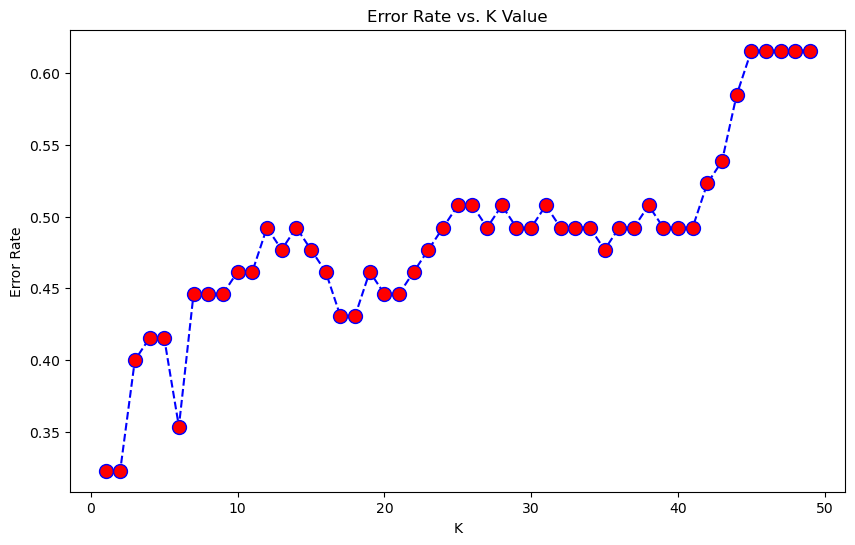

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
Here we can see that that after arouns K>25 the error rate just tends to hover around 0.49-0.51
Let's retrain the model with that and check the classification report!

In [58]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=20')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))


# TP = When Actual is True and predicted is also True
# TN =When Actual is False and predicted is also False
# FP = When actual is Fasle and predicted is True
# FN = when actual is True and predicted is False



WITH K=20


[[20  5  0  0  0  0]
 [ 2 17  0  0  0  0]
 [ 4  1  0  0  0  0]
 [ 3  3  0  0  0  0]
 [ 2  1  0  0  0  1]
 [ 1  0  0  0  0  5]]


              precision    recall  f1-score   support

           1       0.62      0.80      0.70        25
           2       0.63      0.89      0.74        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         4
           7       0.83      0.83      0.83         6

    accuracy                           0.65        65
   macro avg       0.35      0.42      0.38        65
weighted avg       0.50      0.65      0.56        65

0.6461538461538462


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
